In [1]:
#Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
print(os.getcwd())

/Users/arnaldofolder/Downloads/Step 6


Fit Models with Training Dataset

In [3]:
df_2 = pd.read_csv('Notebook_step3_output_final.csv')

In [4]:
df_2.head()

,Unnamed: 0,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,0,Hilltop Ski Area,Alaska,2090.0,294.0,0.0,0.0,0.0,0.0,0.0,...,30.0,30.000000,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,1
1,1,Sunrise Park Resort,Arizona,11100.0,1800.0,0.0,0.0,0.0,1.0,2.0,...,800.0,80.000000,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,2
2,2,Yosemite Ski & Snowboard Area,California,7800.0,600.0,0.0,0.0,0.0,0.0,0.0,...,88.0,174.873239,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,2
3,3,Boreal Mountain Resort,California,7700.0,500.0,0.0,0.0,0.0,1.0,1.0,...,380.0,200.000000,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,2
4,4,Dodge Ridge,California,8200.0,1600.0,0.0,0.0,0.0,0.0,1.0,...,862.0,174.873239,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,2


In [5]:
columns_df_2 = list(df_2.columns)

In [6]:
df_2 = df_2.drop(columns = columns_df_2[0])

In [7]:
df_2.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Hilltop Ski Area,Alaska,2090.0,294.0,0.0,0.0,0.0,0.0,0.0,1.0,...,30.0,30.000000,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,1
1,Sunrise Park Resort,Arizona,11100.0,1800.0,0.0,0.0,0.0,1.0,2.0,3.0,...,800.0,80.000000,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,2
2,Yosemite Ski & Snowboard Area,California,7800.0,600.0,0.0,0.0,0.0,0.0,0.0,1.0,...,88.0,174.873239,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,2
3,Boreal Mountain Resort,California,7700.0,500.0,0.0,0.0,0.0,1.0,1.0,3.0,...,380.0,200.000000,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,2
4,Dodge Ridge,California,8200.0,1600.0,0.0,0.0,0.0,0.0,1.0,2.0,...,862.0,174.873239,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,2


In [8]:
#Model 3
#Drop summit_elev and vertical_drop 
# Import the preprocessing package from the sklearn library
from sklearn import preprocessing
# Declare an explanatory variable, called X,and assign it the result of dropping 'summit_elev' and 'vertical_drop' from the df
x = df_2.drop(['Name','state', 'summit_elev','vertical_drop', 'AdultWeekday', 'AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df_2.AdultWeekend

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(x)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(x) 

In [9]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split
# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [10]:
#Import linear_model from sklearn
#Import explained_variance_score,mean_absolute_error from sklearn.metrics
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [11]:
#Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. 
#The explained variance is a measure of the variation explained by the model. 
#This is also known as the R-squared value.
#Use predict() function 
#Make a variable called y_pred and assign it the result of calling predict() 
#Variable parameter X_test
y_pred = lm.predict(X_test)

In [12]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error
# You can plug y_test and y_pred into the functions to evaluate the model
variance_score_3 = explained_variance_score(y_test, y_pred)
mean_absolute_error_3 = mean_absolute_error(y_test, y_pred)

In [13]:
print('Variance Score is', variance_score_3)
print('Mean absolute error is', mean_absolute_error_3)

Variance Score is 0.1259754883322719
Mean absolute error is 10.39779228570428


In [14]:
#Print the intercept value from the linear model.
#The intercept is the mean AdultWeekday price for all the resorts given the other characteristics.  
print('The intercept is', lm.intercept_)

The intercept is 56.84708158683219


In [50]:
df_coeff['Coefficient'].sort_values(ascending = False)

Runs                 5.596709e+00
clusters             4.750811e+00
quad                 2.655619e+00
fastQuads            2.637861e+00
surface              2.425592e+00
triple               2.030229e+00
daysOpenLastYear     1.957310e+00
averageSnowfall      1.341162e+00
total_chairs         1.274649e+00
Snow Making_ac       1.262172e+00
yearsOpen            1.044784e+00
LongestRun_mi        1.005198e+00
projectedDaysOpen    8.580993e-01
double               7.242100e-01
TerrainParks         5.049631e-01
NightSkiing_ac       5.980718e-02
SkiableTerrain_ac    1.282563e-02
fastSixes            2.220446e-16
fastEight            2.220446e-16
trams                0.000000e+00
Name: Coefficient, dtype: float64

In [17]:
#Use the data to get the ticket value for Big Mountain Resort

In [18]:
df = pd.read_csv('1589505302_05152020_updated_ski_data_-_updated_ski_data.csv')

In [19]:
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [20]:
big_mountain_resort = df[df['Name'].str.contains('Big Mountain Resort')]

In [21]:
pd.set_option('max_columns', None)
big_mountain_resort

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
151,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0


In [53]:
print(df_coeff)

                    Coefficient
trams              0.000000e+00
fastEight          2.220446e-16
fastSixes          2.220446e-16
fastQuads          2.637861e+00
quad               2.655619e+00
triple             2.030229e+00
double             7.242100e-01
surface            2.425592e+00
total_chairs       1.274649e+00
Runs               5.596709e+00
TerrainParks       5.049631e-01
LongestRun_mi      1.005198e+00
SkiableTerrain_ac  1.282563e-02
Snow Making_ac     1.262172e+00
daysOpenLastYear   1.957310e+00
yearsOpen          1.044784e+00
averageSnowfall    1.341162e+00
projectedDaysOpen  8.580993e-01
NightSkiing_ac     5.980718e-02
clusters           4.750811e+00


In [51]:
variables_1 = [105.0, 0, 2, 3, 3, 6, 123.0, 333.00, 14, 600, 72.0, 3.3, 123.0, 0, 4.0, 600, 3000,
              0, 0, 0]

In [55]:
coefficients_1 = [5.596709e+00, 4.750811e+00, 2.655619e+00, 2.637861e+00, 2.425592e+00, 2.030229e+00, 1.957310e+00,
                   1.341162e+00, 1.274649e+00, 1.262172e+00, 1.044784e+00, 1.005198e+00, 8.580993e-01, 7.242100e-01,
                   5.049631e-01, 5.980718e-02, 1.282563e-02, 2.220446e-16, 2.220446e-16, 0.000000e+00]

In [38]:
intercept = 56.84708158683219

In [61]:
adult_weekend_price_2 = np.dot(variables_1, coefficients_1) + intercept

In [63]:
#Price of 2400 does not make sense
#We need to remove some coefficient to make the price more meaningful
adult_weekend_price_2

2400.1577252868324

In [64]:
#Coefficients to take into consideration
#trams, fastEight, fastSixes, fastQuads, quad, triple, double, surface, TerrainParks, LongestRun_mi

coefficients_2 = [0.000000e+00, 2.220446e-16, 2.220446e-16, 2.637861e+00, 2.655619e+00, 2.030229e+00,7.242100e-01,
               2.425592e+00, 5.049631e-01, 1.005198e+00]
variables_2 = [0, 0, 0, 3.0, 2.0, 6.0, 0.0, 3.0, 4.0, 3.3]


In [65]:
adultWeekend_price_2 = np.dot(coefficients, variables)+ intercept

In [66]:
print('Price of the ticket should be', adultWeekend_price)

Price of the ticket should be 94.86705838683218


In [67]:
#By taking those variables into consideration(that the manager can work as well), we identified a possible price
#Using np.dot (sum product) plus the intercept, we got a ticket price of 95.00 for Big Mountain Resort

Text(0.5, 1.0, 'summit_elev by vertical_drop by cluster')

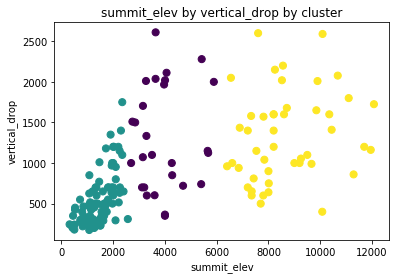

In [68]:
#As part of reviewing the results it is an important step to generate figures to visualize the data story.
#We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values
#Run the example below to get you started and build two or three more figures to include in your data story telling.
plt.scatter(df_2['summit_elev'], df_2['vertical_drop'], c=df_2['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')

Text(0.5, 1.0, 'total_chairs by projectedDaysOpen by cluster')

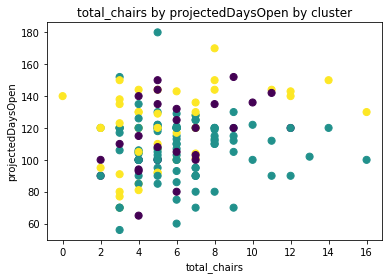

In [69]:
plt.scatter(df_2['total_chairs'], df_2['projectedDaysOpen'], c=df_2['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('total_chairs')
plt.ylabel('projectedDaysOpen')
plt.title('total_chairs by projectedDaysOpen by cluster')

Text(0.5, 1.0, 'total_chairs by projectedDaysOpen by cluster')

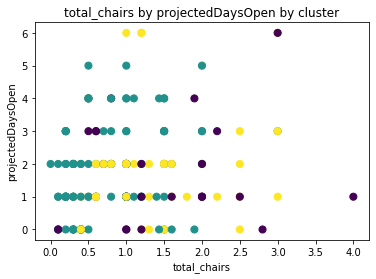

In [70]:
plt.scatter(df_2['LongestRun_mi'], df_2['TerrainParks'], c=df_2['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('total_chairs')
plt.ylabel('projectedDaysOpen')
plt.title('total_chairs by projectedDaysOpen by cluster')

In [71]:
state_dummies = pd.get_dummies(df_2['state'], prefix = 'state')

In [72]:
df_3 = df.drop(columns = ['state', 'Region'])

In [73]:
df_3.head()

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [74]:
df_3 = pd.concat([state_dummies, df_2], axis = 1)

In [75]:
df_3.head()

,state_Alaska,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Missouri,state_Montana,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hilltop Ski Area,Alaska,2090.0,294.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,13.0,1.0,1.0,30.0,30.000000,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunrise Park Resort,Arizona,11100.0,1800.0,0.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,7.0,65.0,2.0,1.2,800.0,80.000000,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,2
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yosemite Ski & Snowboard Area,California,7800.0,600.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,5.0,10.0,2.0,0.4,88.0,174.873239,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,2
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Boreal Mountain Resort,California,7700.0,500.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0,8.0,33.0,6.0,1.0,380.0,200.000000,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,2
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Dodge Ridge,California,8200.0,1600.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,4.0,12.0,67.0,5.0,2.0,862.0,174.873239,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,2


Text(0.5, 1.0, 'summit_elev by state_Alaska by cluster')

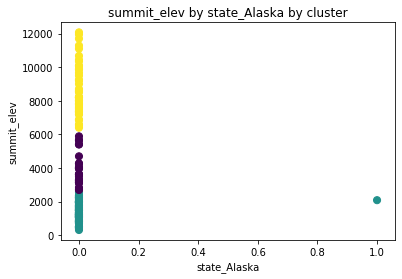

In [76]:
plt.scatter(df_3['state_Alaska'], df_3['summit_elev'], c=df_3['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('state_Alaska')
plt.ylabel('summit_elev')
plt.title('summit_elev by state_Alaska by cluster')

Finalize Code

In [77]:
import pickle
s = pickle.dumps(model)


In [78]:
from joblib import dump, load
dump(model, 'Models') 

['Models']